In [28]:
import numpy as np
import sympy as sy
from matplotlib import pyplot as plt
from IPython.display import display
import pickle
from itertools import product
import sys

# n species

In [2]:
save_res = True
num_samples = 1e2 #per q value
# kappa, lamda = sy.symbols("kappa lamda")
n_arr = np.arange(3, 12*4, 12) # Number of species
q_arr = np.linspace(0, 1, 5) # Probability of dispersal off diagonal
c = 1.0 # Connectance (probability of interaction off diagonal
mean_Jij = 0.2 # Expected value of interaction off diagonals
kappas = np.arange(0, 1e2, 5)

In [3]:
for q in q_arr:
    all_data = {'n': n_arr, 
                'phase_fraction': {'ddi': [], 
                                   'stab': []}}
    for n in all_data['n']:
        print(n)
        data = {'omega_integrand': {'stab': [], 'ddi': []}}
        while len(data['omega_integrand']['stab']) < num_samples:
            # Construct J and C matricies
            'This J construction seems to always be stable'
            J = np.random.normal(0, mean_Jij, (n,n)) * np.random.binomial(1, c, size=(n,n))
            for i in range(n):
                J[i,i] = -1.
            evs = np.linalg.eig(J)[0]
            # Check for non-spatial stability
            if not np.all(np.real(evs) < 0):
                continue
            C = np.zeros((n,n))
            for i, j in product(range(n), repeat=2):
                if i == j:
                    C[i,j] = 1.0
                elif np.random.binomial(1, q):
                    C[i,j] = np.random.uniform() * -np.sign(J[i,j])
            # M = sy.Matrix(J - kappa*C)
            data['omega_integrand']['stab'].append(True)
            data['omega_integrand']['ddi'].append(False)
            for k in kappas:
                # evs = list(M.subs(kappa, k).eigenvals().keys())
                # re_evs = np.array([float(sy.re(ev)) for ev in evs])
                M = J - k*C
                re_evs = np.linalg.eigvals(M).real
                if np.any(re_evs > 0):
                    data['omega_integrand']['stab'][-1] = False
                    data['omega_integrand']['ddi'][-1] = True

        for phase in ['stab', 'ddi']:
            phase_fraction = sum(data['omega_integrand'][phase]) / num_samples
            all_data['phase_fraction'][phase].append(phase_fraction)

    # Save data to pkl
    if save_res:
        with open('random_matrix_q{}_c{}.pkl'.format(q,c), 'wb') as f:
            pickle.dump(all_data, f)

3
15
27
39
3
15
27
39
3
15
27
39
3
15
27
39
3
15
27
39


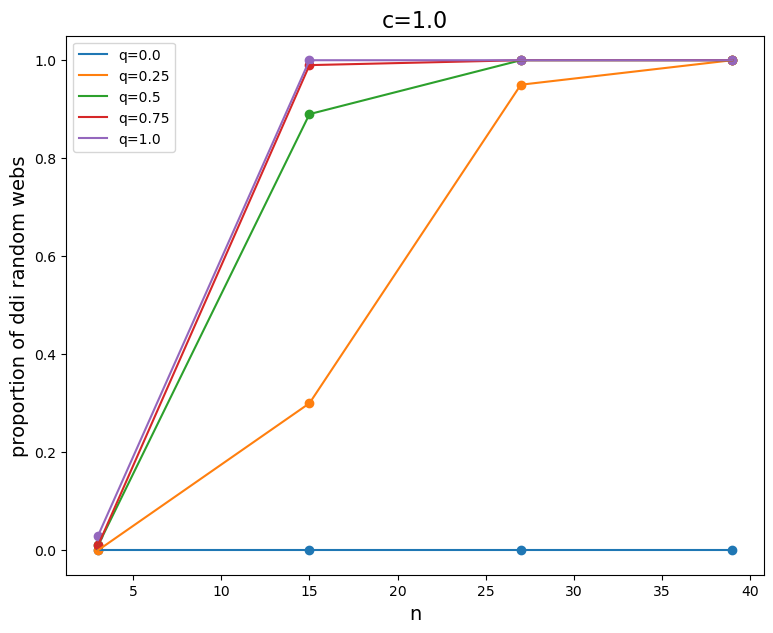

In [8]:
savefig = True
figpath = '/Volumes/GoogleDrive/My Drive/Research/Anderson/SmallWebProject/figs/'
figfn = 'random_matrix_c{}.png'.format(c)
plt.figure(figsize=(9,7))
ax = plt.subplot()
for q in q_arr:
    with open('random_matrix_q{}_c{}.pkl'.format(q,c), 'rb') as file:
        all_data = pickle.load(file)
    # phases = ['stab', 'ddi']
    # colors = ['lightgreen', 'cornflowerblue']
    # labels = ['always stable', 'ddi']
    # for i, phase in enumerate(phases):
    #     ax.scatter(all_data['n'], all_data['phase_fraction'][phase], 
    #                c=colors[i])
    #     ax.plot(all_data['n'], all_data['phase_fraction'][phase], 
    #                c=colors[i], label=labels[i])
    ax.scatter(all_data['n'], all_data['phase_fraction']['ddi'])
    ax.plot(all_data['n'], all_data['phase_fraction']['ddi'], label='q={}'.format(q))
ax.set_xlabel('n', fontsize=14)
ax.set_ylabel('proportion of ddi random webs', fontsize=14)
ax.legend()
ax.set_title('c={}'.format(c), fontsize=16)
if savefig:
    plt.savefig(figpath + figfn, bbox_inches='tight')

# 3 species

In [32]:
num_samples = 5e3 #per q value
q_arr = np.linspace(0,1,5)
c = 1.0 # Connectance
mean_Jij = 0.2
kappas = np.arange(1e3)
mode = 'constrained'
all_data = {'q': q_arr, 
            'phase_fraction': {'wav': [], 
                               'ddi': []}}
for q in all_data['q']:
    data = {'kappa_cs': {'wav': [], 'st': []},
            'omega_integrand': {'wav': [], 'st': [], 
                                'stab': [], 'ddi': []}}
    while len(data['omega_integrand']['stab']) < num_samples:
        # Construct metacommunity jacobian and check for non-spatial stability
        J = np.random.normal(0, mean_Jij, (3,3)) * np.random.binomial(1, c, size=(3,3))
        for i in range(3):
            J[i,i] = -1.
        evs = np.linalg.eig(J)[0]
        if not np.all(np.real(evs) < 0):
            continue
        
        # Construct connectivity matrix
        C = np.zeros((3,3))
        for i, j in product(range(C.shape[0]), repeat=2):
            if i == j:
                # C[i,j] = 1.0
                C[i,j] = np.random.uniform()
            elif np.random.binomial(1, q):
                if mode == 'constrained':
                    C[i,j] = np.random.uniform() * -np.sign(J[i,j])
                elif mode == 'unconstrained':
                    C[i,j] = np.random.uniform(-1,1)
                else:
                    sys.exit()

        # Check for ddi
        M_vec = np.array([J - k*C for k in kappas])
        re_evs = np.linalg.eigvals(M_vec).real
        any_positive = np.any(re_evs > 0, axis=1)
        ddi = np.any(any_positive)
        data['omega_integrand']['stab'].append(ddi == False)
        data['omega_integrand']['ddi'].append(ddi)

    # Store omega data
    for phase in ['stab', 'ddi']:
        phase_fraction = sum(data['omega_integrand'][phase]) / num_samples
        all_data['phase_fraction'][phase].append(phase_fraction)

In [33]:
# Save data to pkl
save_res = True
datafn = 'random_matrix_n3_c{}_{}_diagrelaxed.pkl'.format(c,mode)
if save_res:
    with open(datafn, 'wb') as f:
        pickle.dump(all_data, f)

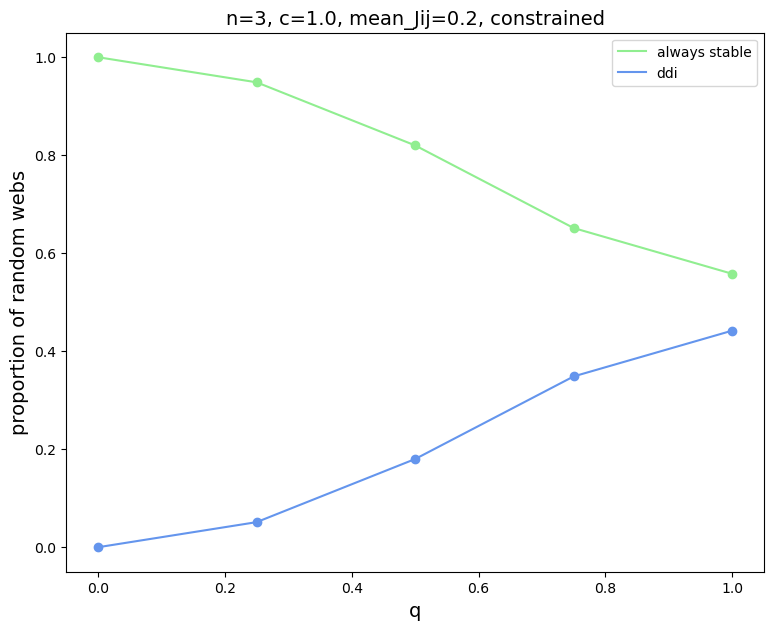

In [34]:
savefig = True
loaddata = False
figpath = '/Volumes/GoogleDrive/My Drive/Research/Anderson/SmallWebProject/figs/'
figfn = datafn[:-3]+'png'
if loaddata:
    with open(datafn, 'rb') as file:
        all_data = pickle.load(file)
plt.figure(figsize=(9,7))
ax = plt.subplot()
phases = ['stab', 'ddi']
colors = ['lightgreen', 'cornflowerblue']
labels = ['always stable', 'ddi']
for i, phase in enumerate(phases):
    ax.scatter(all_data['q'], all_data['phase_fraction'][phase], 
               c=colors[i])
    ax.plot(all_data['q'], all_data['phase_fraction'][phase], 
               c=colors[i], label=labels[i])
ax.set_xlabel('q', fontsize=14)
ax.set_ylabel('proportion of random webs', fontsize=14)
ax.legend()
ax.set_title('n=3, c={}, mean_Jij={}, {}'.format(c, mean_Jij, mode), fontsize=14)
if savefig:
    plt.savefig(figpath + figfn, bbox_inches='tight')